<a href="https://colab.research.google.com/github/wilberquito/sentimental-analysis-twitter/blob/main/SentimentalAnalysisTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
import pandas as pd

In [2]:
try:
  from google.colab import data_table
  data_table.enable_dataframe_formatter()
except e:
  print('Not running in collab')

Cloning open project

In [18]:
!rm -rf assigment
!git clone https://github.com/wilberquito/sentimental-analysis-twitter.git assigment

Cloning into 'assigment'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 165 (delta 68), reused 128 (delta 37), pack-reused 3
Receiving objects: 100% (165/165), 82.84 MiB | 22.25 MiB/s, done.
Resolving deltas: 100% (68/68), done.


Extracting data

In [4]:
with zipfile.ZipFile("assigment/assigment.data.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_data")

In [5]:
import assigment.ml.dataframes as ml_dataframes

train_df, test_df, dublin_test_df = ml_dataframes.get_dataframes()

In [6]:
train_df.tail()

,index,polarity,tweet_id,date,query,user_id,text
1583686,1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1583687,1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1583688,1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1583689,1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1583690,1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
train_df['polarity'].value_counts()

1    793506
0    790185
Name: polarity, dtype: int64

In [8]:
test_df.tail()

,index,polarity,tweet_id,date,query,user_id,text
354,492,1,14071,Sun Jun 14 04:31:28 UTC 2009,latex,yomcat,"After using LaTeX a lot, any other typeset mat..."
355,494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
356,495,1,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
357,496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
358,497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


In [9]:
test_df['polarity'].value_counts()

1    182
0    177
Name: polarity, dtype: int64

In [31]:
dublin_test_df.tail()

,index,tweet_id,text,created_at,user,polarity,category,dataset,user_id
1995,1995,1135837488738701312,RT @paddymacc1: A homeless woman in her 40s ha...,2019-06-04T09:15:34+00:00,NaN,0,Poverty and Homelessness,Dublin City,624997135
1996,1996,1176427176134156288,I've been cycling through Stoneybatter for ove...,2019-09-24T09:24:30+00:00,NaN,0,Mobility,Dublin City,1652841330
1997,1997,1161312283965972481,@AdrianKavanagh @geogsocire @Fingalcoco @Dubfi...,2019-08-13T16:23:19+00:00,NaN,0,Mobility,Fingal,1514423201
1998,1998,1144248479511908352,@KlausBondam @DubCityCouncil Not in the slight...,2019-06-27T14:17:51+00:00,NaN,0,Infrastructure,Dublin City,801797466
1999,1999,1171182518118338561,Also another thing that Dublin seems to be fuc...,2019-09-09T22:04:06+00:00,NaN,0,Mobility,Dublin City,1580678191


In [32]:
dublin_test_df['polarity'].value_counts()

1    1000
0    1000
Name: polarity, dtype: int64

## Most frequent words

Most frequent words in train dataframe

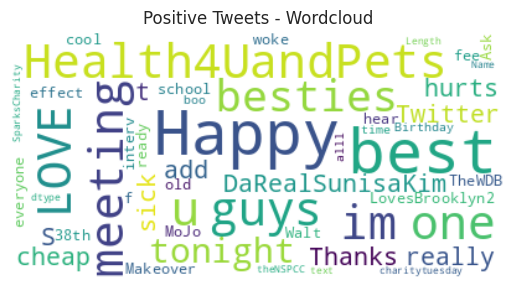

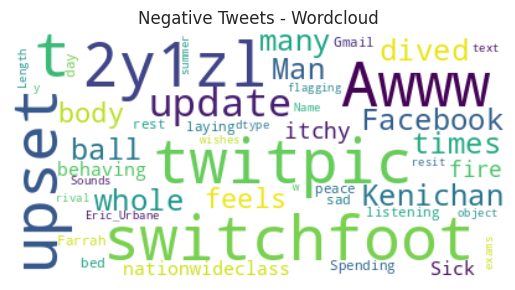

In [33]:
import assigment.utility.plots as plots

plots.wordcloud(train_df)

Most frequent words in test dataframe

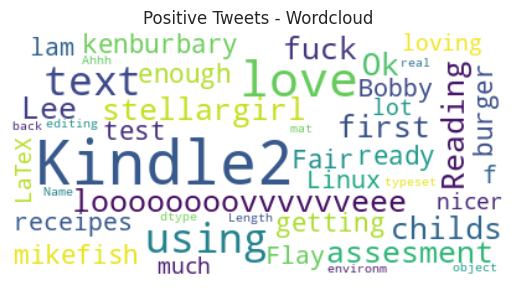

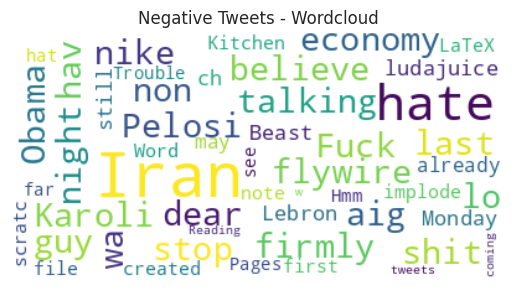

In [34]:
import assigment.utility.plots as plots

plots.wordcloud(test_df)

Most frequent words in dublin test dataframe

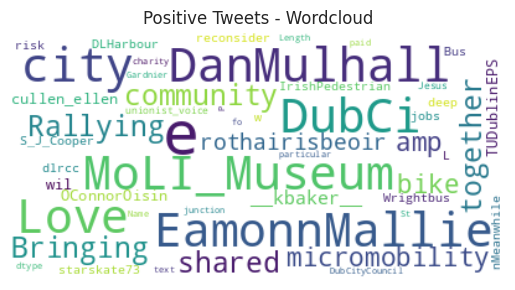

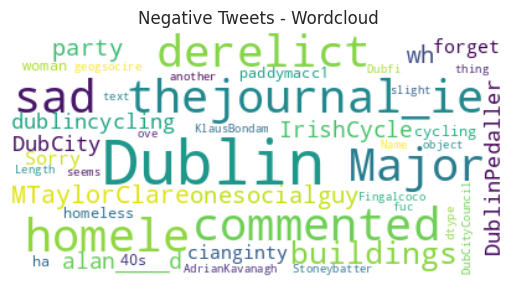

In [35]:
import assigment.utility.plots as plots

plots.wordcloud(dublin_test_df)

## Base Line Model (SVC vs logistic regression)

Using **GridSearchSV** to pick inmediatily between a **SVC** and a **logistic regression**

### Bag of words

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import assigment.ml.transformers as ml_transformers


param_grid = {
    'sgdclassifier__loss': ['hinge', 'log_loss'],
    'columntransformer__text_preprocess__ngram_range': [(1,2)]
}

model = SGDClassifier(random_state=42, penalty='l2')
preprocessor = ml_transformers.text_transformer(tfidf=False)
pipe = make_pipeline(preprocessor, model)

wofbag_grid = GridSearchCV(
    pipe,
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1,
    verbose=10
)

In [37]:
X_train, y_train = train_df[['text']], train_df['polarity']
wofbag_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text_preprocess',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'text')])),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'columntransformer__text_preprocess__ngram_range': [(1,
                                                                              2)],
                         'sgdclassifier__loss': ['hinge', 'log_loss']},
             scoring='accuracy', verbose=10)

In [38]:
wofbag_grid.best_params_

{'columntransformer__text_preprocess__ngram_range': (1, 2),
 'sgdclassifier__loss': 'hinge'}

In [39]:
wofbag_grid.cv_results_

{'mean_fit_time': array([106.58818326, 106.12905354]),
 'std_fit_time': array([0.73910046, 2.25654533]),
 'mean_score_time': array([14.25661578, 13.86641626]),
 'std_score_time': array([0.65070472, 0.09478451]),
 'param_columntransformer__text_preprocess__ngram_range': masked_array(data=[(1, 2), (1, 2)],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_sgdclassifier__loss': masked_array(data=['hinge', 'log_loss'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'columntransformer__text_preprocess__ngram_range': (1, 2),
   'sgdclassifier__loss': 'hinge'},
  {'columntransformer__text_preprocess__ngram_range': (1, 2),
   'sgdclassifier__loss': 'log_loss'}],
 'split0_test_score': array([0.76820979, 0.76665962]),
 'split1_test_score': array([0.76608743, 0.76338488]),
 'split2_test_score': array([0.76552545, 0.76387424]),
 'split3_test_score': array([0.77263858, 0.77093371]),
 'split4_test_score

Saving stats per each dataset

In [40]:
!mkdir results

mkdir: cannot create directory ‘results’: File exists


In [41]:
import assigment.ml.test as ml_test

X_test, y_test = test_df[['text']], test_df['polarity']
dublin_X_test, dublin_y_test = dublin_test_df[['text']], dublin_test_df['polarity']
model_name = ['S140-test.svc.bagofwords', 'dublin.svc.bagofwords']
sets = [(X_test, y_test), (dublin_X_test, dublin_y_test)]

joined_tests = list(zip(model_name, sets))

for test_name, (X_test, y_test) in joined_tests:
  metrics = ml_test.test(wofbag_grid, X_test, y_test, test_name)
  print(metrics)

                          precision  recall_score  f1_score  accuracy_score
S140-test.svc.bagofwords       0.79          0.89     0.837           0.825
                       precision  recall_score  f1_score  accuracy_score
dublin.svc.bagofwords      0.683         0.697      0.69           0.687


Analysing predictions from the "same" distribution

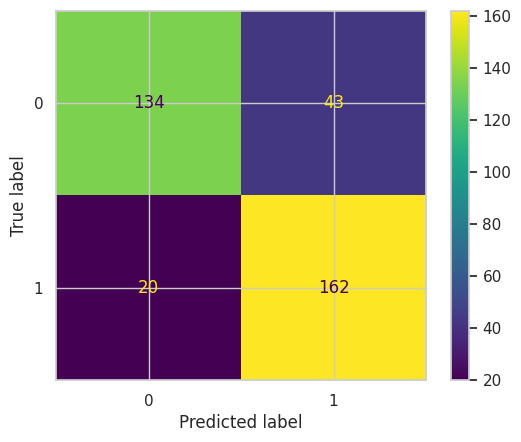

In [42]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [43]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
14,"#lebron best athlete of our generation, if not...",1,0
23,"good news, just had a call from the Visa offic...",1,0
31,US planning to resume the military tribunals a...,0,1
34,@sekseemess no. I'm not itchy for now. Maybe l...,0,1
35,RT @jessverr I love the nerdy Stanford human b...,1,0
...,...,...,...
332,Today is a good day to dislike AT&amp;T. Vote ...,0,1
338,"The #Kindle2 seems the best eReader, but will ...",1,0
344,"My dad was in NY for a day, we ate at MESA gri...",1,0
345,Fighting with LaTex. Again...,0,1


Analysing predictions from "dublin" distribution

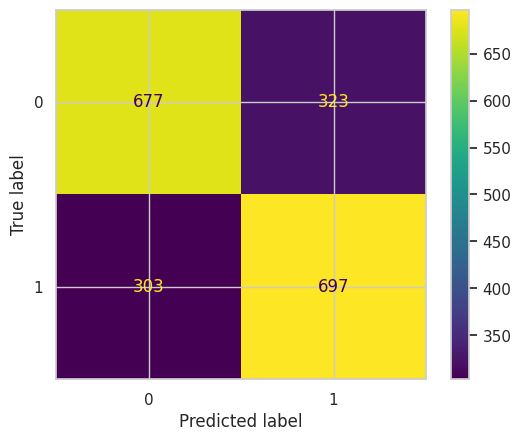

In [44]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [45]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
7,@ShayBrennan @dlrcc @DublinVelo2019 @DublinCom...,1,0
10,"does anyone @DubCham remember Clontarf, Blackr...",1,0
11,"In the latest episode of The Explainer, we exa...",1,0
18,Great article by Colm McCarthy on the NIMBYism...,1,0
20,@SoniaMcEntee @PatJCurran @greenparty_ie He wa...,1,0
...,...,...,...
1981,RT @CitizenW0lf: 'Shocking' new research prove...,0,1
1985,"“In Stoke, the council created a wholly owned ...",0,1
1991,@MorgenrothEdgar Not sure Dublin inner city is...,0,1
1992,@LuckyJi47830886 @jenny87797866 @YConned @caul...,0,1


### TF-idf

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import assigment.ml.transformers as ml_transformers


param_grid = {
    'sgdclassifier__loss': ['hinge', 'log_loss'],
    'columntransformer__text_preprocess__ngram_range': [(1,2)]
}

model = SGDClassifier(random_state=42, penalty='l2')
preprocessor = ml_transformers.text_transformer(tfidf=True)
pipe = make_pipeline(preprocessor, model)

tfid_grid = GridSearchCV(
    pipe,
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1,
    verbose=10
)

In [47]:
X_train, y_train = train_df[['text']], train_df['polarity']
tfid_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text_preprocess',
                                                                         TfidfVectorizer(stop_words='english'),
                                                                         'text')])),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'columntransformer__text_preprocess__ngram_range': [(1,
                                                                              2)],
                         'sgdclassifier__loss': ['hinge', 'log_loss']},
             scoring='accuracy', verbose=10)

In [48]:
tfid_grid.best_params_

{'columntransformer__text_preprocess__ngram_range': (1, 2),
 'sgdclassifier__loss': 'hinge'}

In [49]:
tfid_grid.cv_results_

{'mean_fit_time': array([112.75382876, 114.3363584 ]),
 'std_fit_time': array([2.46044953, 1.51028149]),
 'mean_score_time': array([16.58377514, 15.62342653]),
 'std_score_time': array([0.49162229, 0.07637833]),
 'param_columntransformer__text_preprocess__ngram_range': masked_array(data=[(1, 2), (1, 2)],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_sgdclassifier__loss': masked_array(data=['hinge', 'log_loss'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'columntransformer__text_preprocess__ngram_range': (1, 2),
   'sgdclassifier__loss': 'hinge'},
  {'columntransformer__text_preprocess__ngram_range': (1, 2),
   'sgdclassifier__loss': 'log_loss'}],
 'split0_test_score': array([0.7470883, 0.7431734]),
 'split1_test_score': array([0.74265166, 0.73874938]),
 'split2_test_score': array([0.7447796 , 0.74098466]),
 'split3_test_score': array([0.75112869, 0.74666128]),
 'split4_test_score':

Saving stats per each dataset

In [50]:
import assigment.ml.test as ml_test

X_test, y_test = test_df[['text']], test_df['polarity']
dublin_X_test, dublin_y_test = dublin_test_df[['text']], dublin_test_df['polarity']
model_name = ['S140-test.svc.tfidf', 'dublin.svc.tfidf']
sets = [(X_test, y_test), (dublin_X_test, dublin_y_test)]

joined_tests = list(zip(model_name, sets))

for test_name, (X_test, y_test) in joined_tests:
  metrics = ml_test.test(tfid_grid, X_test, y_test, test_name)
  print(metrics)

                     precision  recall_score  f1_score  accuracy_score
S140-test.svc.tfidf      0.759         0.885     0.817           0.799
                  precision  recall_score  f1_score  accuracy_score
dublin.svc.tfidf      0.652         0.732      0.69            0.67


Analysing predictions from the "same" distribution

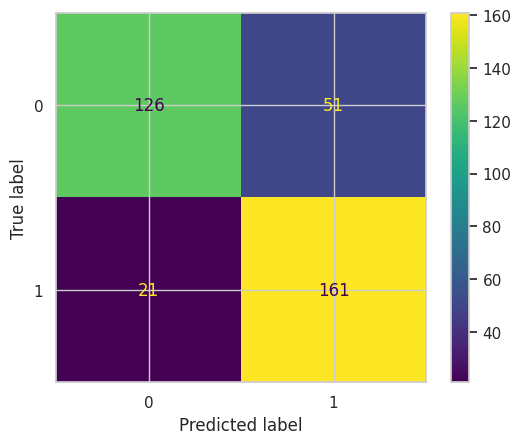

In [51]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = tfid_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [52]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = tfid_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
14,"#lebron best athlete of our generation, if not...",1,0
23,"good news, just had a call from the Visa offic...",1,0
31,US planning to resume the military tribunals a...,0,1
34,@sekseemess no. I'm not itchy for now. Maybe l...,0,1
38,is going to sleep then on a bike ride:],1,0
...,...,...,...
331,Fuzzball is more fun than AT&amp;T ;P http://f...,0,1
332,Today is a good day to dislike AT&amp;T. Vote ...,0,1
338,"The #Kindle2 seems the best eReader, but will ...",1,0
344,"My dad was in NY for a day, we ate at MESA gri...",1,0


Analysing predictions from "dublin" distribution

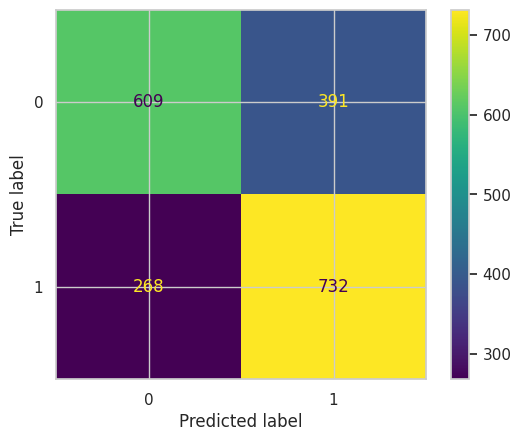

In [53]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = tfid_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [54]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = tfid_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
7,@ShayBrennan @dlrcc @DublinVelo2019 @DublinCom...,1,0
18,Great article by Colm McCarthy on the NIMBYism...,1,0
20,@SoniaMcEntee @PatJCurran @greenparty_ie He wa...,1,0
22,@pauldclynam @ChrisILbondo @LeoVaradkar This i...,1,0
24,@DubFireBrigade Delighted to see no emergencie...,1,0
...,...,...,...
1986,"""Find a way, not to impart your brand of justi...",0,1
1991,@MorgenrothEdgar Not sure Dublin inner city is...,0,1
1992,@LuckyJi47830886 @jenny87797866 @YConned @caul...,0,1
1997,@AdrianKavanagh @geogsocire @Fingalcoco @Dubfi...,0,1


## Multinomial NB

### Bag of words

In [55]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
preprocessor = ml_transformers.text_transformer(tfidf=False)
pipe = make_pipeline(preprocessor, model)

alphas = [0.1,0.5,1.0,2.0,4.0]


grid_params = {
  'multinomialnb__alpha': alphas
  }

wofbag_grid = GridSearchCV(
    pipe,
    grid_params,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1
)

In [56]:
X_train, y_train = train_df[['text']], train_df['polarity']
wofbag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text_preprocess',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'text')])),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0, 4.0]},
             scoring='accuracy')

In [57]:
wofbag_grid.best_params_

{'multinomialnb__alpha': 4.0}

In [58]:
wofbag_grid.cv_results_

{'mean_fit_time': array([37.83269506, 37.65717158, 38.29137239, 38.06448069, 34.95784736]),
 'std_fit_time': array([0.41039162, 0.7135625 , 0.49414702, 0.41966807, 6.25960875]),
 'mean_score_time': array([ 8.21123862,  8.68745203,  8.29424772, 10.62280169,  7.38961225]),
 'std_score_time': array([0.87923751, 0.8692448 , 0.88111753, 2.35402078, 1.79749195]),
 'param_multinomialnb__alpha': masked_array(data=[0.1, 0.5, 1.0, 2.0, 4.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'multinomialnb__alpha': 0.1},
  {'multinomialnb__alpha': 0.5},
  {'multinomialnb__alpha': 1.0},
  {'multinomialnb__alpha': 2.0},
  {'multinomialnb__alpha': 4.0}],
 'split0_test_score': array([0.74593909, 0.75573264, 0.75922763, 0.76155762, 0.76253635]),
 'split1_test_score': array([0.73727497, 0.74826513, 0.7524484 , 0.75520146, 0.75653063]),
 'split2_test_score': array([0.7342125 , 0.74586567, 0.75022258, 0.7528683 , 0.75457949]),
 'split

In [59]:
import assigment.ml.test as ml_test

X_test, y_test = test_df[['text']], test_df['polarity']
dublin_X_test, dublin_y_test = dublin_test_df[['text']], dublin_test_df['polarity']
model_name = ['S140-test.multinomialnb.wofbag', 'dublin.multinomialnb.wofbag']
sets = [(X_test, y_test), (dublin_X_test, dublin_y_test)]

joined_tests = list(zip(model_name, sets))

for test_name, (X_test, y_test) in joined_tests:
  metrics = ml_test.test(wofbag_grid, X_test, y_test, test_name)
  print(metrics)

                                precision  recall_score  f1_score  \
S140-test.multinomialnb.wofbag      0.848         0.797     0.822   

                                accuracy_score  
S140-test.multinomialnb.wofbag           0.825  
                             precision  recall_score  f1_score  accuracy_score
dublin.multinomialnb.wofbag      0.713         0.595     0.649           0.678


Analysing predictions from "same" distribution

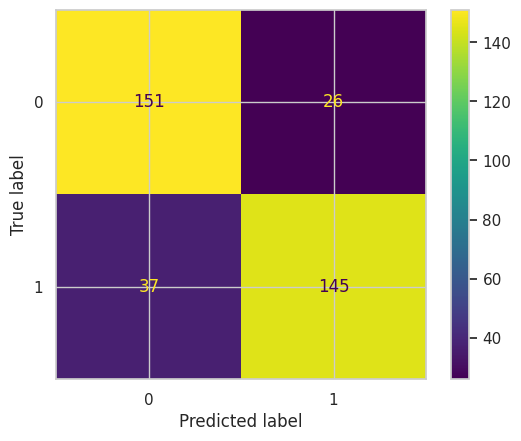

In [60]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [61]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
2,"Ok, first assesment of the #kindle2 ...it fuck...",1,0
3,@kenburbary You'll love your Kindle2. I've had...,1,0
4,@mikefish Fair enough. But i have the Kindle2...,1,0
14,"#lebron best athlete of our generation, if not...",1,0
18,@Pmillzz lebron IS THE BOSS,1,0
...,...,...,...
337,@cwong08 I have a Kindle2 (&amp; Sony PRS-500)...,1,0
338,"The #Kindle2 seems the best eReader, but will ...",1,0
344,"My dad was in NY for a day, we ate at MESA gri...",1,0
349,Monday already. Iran may implode. Kitchen is a...,0,1


Analysing predictions from "dublin" distribution

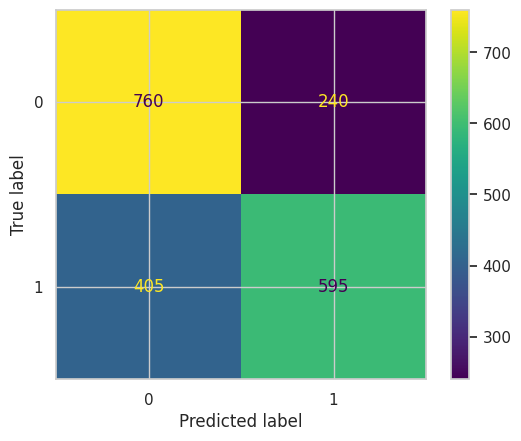

In [62]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [63]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = wofbag_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
1,Love my city and community!! Rallying together...,1,0
4,@OConnorOisin @TUDublinEPS @IrishPedestrian @L...,1,0
7,@ShayBrennan @dlrcc @DublinVelo2019 @DublinCom...,1,0
10,"does anyone @DubCham remember Clontarf, Blackr...",1,0
12,"Hey @Luas, could you go back to displaying ser...",1,0
...,...,...,...
1983,Ireland is one of only four member states who ...,0,1
1986,"""Find a way, not to impart your brand of justi...",0,1
1991,@MorgenrothEdgar Not sure Dublin inner city is...,0,1
1992,@LuckyJi47830886 @jenny87797866 @YConned @caul...,0,1


### TFI-idf

In [64]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
preprocessor = ml_transformers.text_transformer(tfidf=True)
pipe = make_pipeline(preprocessor, model)

alphas = [0.1,0.5,1.0,2.0,4.0]


grid_params = {
  'multinomialnb__alpha': alphas
  }

tfid_grid = GridSearchCV(
    pipe,
    grid_params,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1
)

In [65]:
X_train, y_train = train_df[['text']], train_df['polarity']
tfid_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text_preprocess',
                                                                         TfidfVectorizer(stop_words='english'),
                                                                         'text')])),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0, 4.0]},
             scoring='accuracy')

In [66]:
tfid_grid.best_params_

{'multinomialnb__alpha': 4.0}

In [67]:
tfid_grid.cv_results_

{'mean_fit_time': array([40.01538887, 39.56114039, 39.52945418, 39.6758626 , 36.62434478]),
 'std_fit_time': array([0.3059104 , 0.50153214, 0.23217805, 0.53854918, 6.09990605]),
 'mean_score_time': array([8.64855623, 9.3193326 , 8.69950738, 8.98394003, 7.84381633]),
 'std_score_time': array([0.57698905, 0.84991416, 0.49880373, 1.27722008, 1.66576469]),
 'param_multinomialnb__alpha': masked_array(data=[0.1, 0.5, 1.0, 2.0, 4.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'multinomialnb__alpha': 0.1},
  {'multinomialnb__alpha': 0.5},
  {'multinomialnb__alpha': 1.0},
  {'multinomialnb__alpha': 2.0},
  {'multinomialnb__alpha': 4.0}],
 'split0_test_score': array([0.73259687, 0.74496668, 0.75089269, 0.75577052, 0.75866249]),
 'split1_test_score': array([0.72193106, 0.73582898, 0.7425822 , 0.74795572, 0.75184537]),
 'split2_test_score': array([0.71662383, 0.7318604 , 0.73910298, 0.74467541, 0.74864083]),
 'split3_tes

In [68]:
import assigment.ml.test as ml_test

X_test, y_test = test_df[['text']], test_df['polarity']
dublin_X_test, dublin_y_test = dublin_test_df[['text']], dublin_test_df['polarity']
model_name = ['S140-test.multinomialnb.tfidf', 'dublin.multinomialnb.tfidf']
sets = [(X_test, y_test), (dublin_X_test, dublin_y_test)]

joined_tests = list(zip(model_name, sets))

for test_name, (X_test, y_test) in joined_tests:
  metrics = ml_test.test(tfid_grid, X_test, y_test, test_name)
  print(metrics)

                               precision  recall_score  f1_score  \
S140-test.multinomialnb.tfidf      0.842         0.764     0.801   

                               accuracy_score  
S140-test.multinomialnb.tfidf           0.808  
                            precision  recall_score  f1_score  accuracy_score
dublin.multinomialnb.tfidf      0.713         0.584     0.642           0.674


Analysing predictions of the "same" distribution

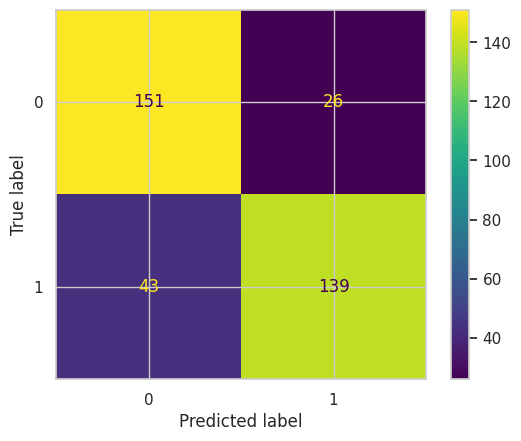

In [69]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = tfid_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [70]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = test_df[['text']], test_df['polarity']
y_pred = tfid_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
2,"Ok, first assesment of the #kindle2 ...it fuck...",1,0
3,@kenburbary You'll love your Kindle2. I've had...,1,0
4,@mikefish Fair enough. But i have the Kindle2...,1,0
10,@Karoli I firmly believe that Obama/Pelosi hav...,0,1
14,"#lebron best athlete of our generation, if not...",1,0
...,...,...,...
331,Fuzzball is more fun than AT&amp;T ;P http://f...,0,1
337,@cwong08 I have a Kindle2 (&amp; Sony PRS-500)...,1,0
338,"The #Kindle2 seems the best eReader, but will ...",1,0
344,"My dad was in NY for a day, we ate at MESA gri...",1,0


Analysing predictions of the "dublin" distribution

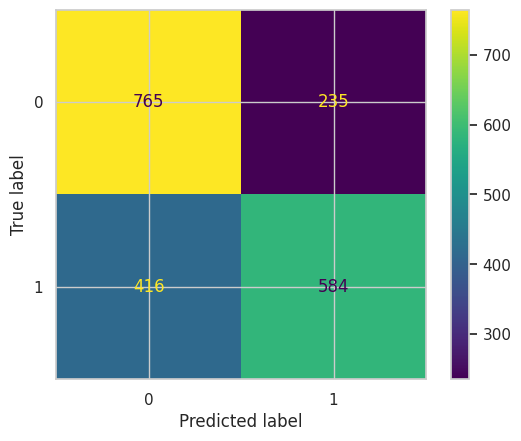

In [71]:
import numpy as np
import assigment.utility.plots as plots

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = tfid_grid.predict(X_test)

plots.confusion_matrix(y_test, y_pred, np.unique(y_train))

In [72]:
import pandas as pd
import assigment.utility.utility as a_utility

X_train, y_train = train_df[['text']], train_df['polarity']
X_test, y_test = dublin_test_df[['text']], dublin_test_df['polarity']
y_pred = tfid_grid.predict(X_test)

error_indexes = a_utility.get_error_indexes(y_test, y_pred)

text, polarity = X_test.iloc[error_indexes]['text'], y_test.iloc[error_indexes]
df = pd.concat([text, polarity],axis=1)
df['predicted'] = abs(df['polarity'] - 1)
df

,text,polarity,predicted
1,Love my city and community!! Rallying together...,1,0
2,Bringing shared #micromobility e-bike &amp; e-...,1,0
3,@rothairisbeoir @__kbaker__ @cullen_ellen @wil...,1,0
7,@ShayBrennan @dlrcc @DublinVelo2019 @DublinCom...,1,0
10,"does anyone @DubCham remember Clontarf, Blackr...",1,0
...,...,...,...
1983,Ireland is one of only four member states who ...,0,1
1986,"""Find a way, not to impart your brand of justi...",0,1
1991,@MorgenrothEdgar Not sure Dublin inner city is...,0,1
1992,@LuckyJi47830886 @jenny87797866 @YConned @caul...,0,1


## Tiny BERT

In [6]:
!pip install transformers tqdm > /dev/null

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
from torch.optim import AdamW
import assigment.nn.datasets as nn_datasets
import assigment.nn.engine as nn_engine


# Set the device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the TinyBERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('prajjwal1/bert-tiny', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')

BATCH_SIZE = 4096
TEXT_MAX_LEN = 128

# Set up the data loaders
train_dataset = nn_datasets.TwitterDataset(train_df, tokenizer, max_length=TEXT_MAX_LEN)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Move the model to the device
model.to(device)

# Set the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

nn_engine.train(model, train_dataloader, optimizer, num_epochs, device)

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

Epoch 1/3, Training Loss: 0.5626, Training Accuracy: 0.7077, Training F1 Score: 0.7063


  0%|          | 0/387 [00:00<?, ?it/s]

Epoch 2/3, Training Loss: 0.4717, Training Accuracy: 0.7771, Training F1 Score: 0.7750


  0%|          | 0/387 [00:00<?, ?it/s]

Epoch 3/3, Training Loss: 0.4514, Training Accuracy: 0.7886, Training F1 Score: 0.7864


In [8]:
import torch

torch.save(model.state_dict(), 'trained_model.pth')

In [9]:
from transformers import BertForSequenceClassification, BertConfig
import torch

config = BertConfig.from_pretrained('prajjwal1/bert-tiny')
trained_model = BertForSequenceClassification(config)
trained_model.load_state_dict(torch.load('trained_model.pth'))

<All keys matched successfully>

In [10]:
import assigment.nn.engine as nn_engine
import assigment.nn.datasets as nn_datasets
from transformers import BertTokenizer
from torch.utils.data import DataLoader


tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')

BATCH_SIZE = 4096
TEXT_MAX_LEN = 128

# Set up the data loaders
test_dataset = nn_datasets.TwitterDataset(test_df, tokenizer, max_length=TEXT_MAX_LEN)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trained_model.to(device)

stats = nn_engine.test(trained_model, test_dataloader, device)
df = pd.DataFrame(stats, index=['S140-test.tinyBERT'])
df.to_csv('S140-test.tinyBERT.csv')
df

  0%|          | 0/1 [00:00<?, ?it/s]

,precision,recall_score,accuracy_score,f1_score
S140-test.tinyBERT,0.784,0.857,0.808,0.819


In [11]:
import assigment.nn.engine as nn_engine
import assigment.nn.datasets as nn_datasets
from transformers import BertTokenizer
from torch.utils.data import DataLoader


tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')

BATCH_SIZE = 4096
TEXT_MAX_LEN = 128

# Set up the data loaders
test_dataset = nn_datasets.TwitterDataset(dublin_test_df, tokenizer, max_length=TEXT_MAX_LEN)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trained_model.to(device)

stats = nn_engine.test(trained_model, test_dataloader, device)
df = pd.DataFrame(stats, index=['dublin.tinyBERT'])
df.to_csv('dublin.tinyBERT.csv')
df

  0%|          | 0/1 [00:00<?, ?it/s]

,precision,recall_score,accuracy_score,f1_score
dublin.tinyBERT,0.682,0.783,0.709,0.729


## Results

In [19]:
import assigment.utility.tests_merger as tests_merger

merged_df = tests_merger.merge('assigment/results')
merged_df

,precision,recall_score,f1_score,accuracy_score
Unnamed: 0,,,,
S140-test.svc.tfidf,0.759,0.885,0.817,0.799
dublin.multinomialnb.tfidf,0.713,0.584,0.642,0.674
dublin.tinyBERT,0.693,0.700,0.697,0.695
S140-test.multinomialnb.wofbag,0.848,0.797,0.822,0.825
dublin.svc.bagofwords,0.683,0.697,0.690,0.687
dublin.multinomialnb.wofbag,0.713,0.595,0.649,0.678
S140-test.svc.bagofwords,0.790,0.890,0.837,0.825
S140-test.multinomialnb.tfidf,0.842,0.764,0.801,0.808
dublin.svc.tfidf,0.652,0.732,0.690,0.670


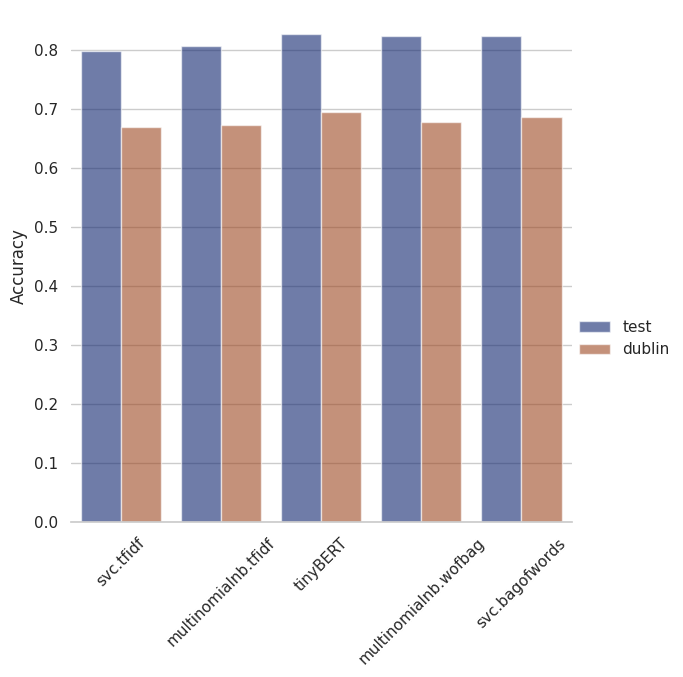

In [20]:
import assigment.utility.plots as u_plots

u_plots.grouped_bar(merged_df, 'accuracy_score')

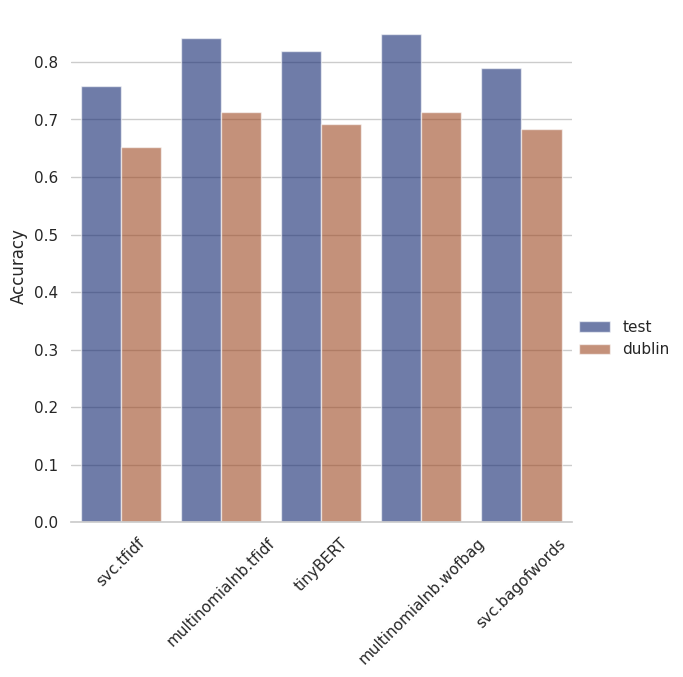

In [21]:
import assigment.utility.plots as u_plots

u_plots.grouped_bar(merged_df, 'precision')

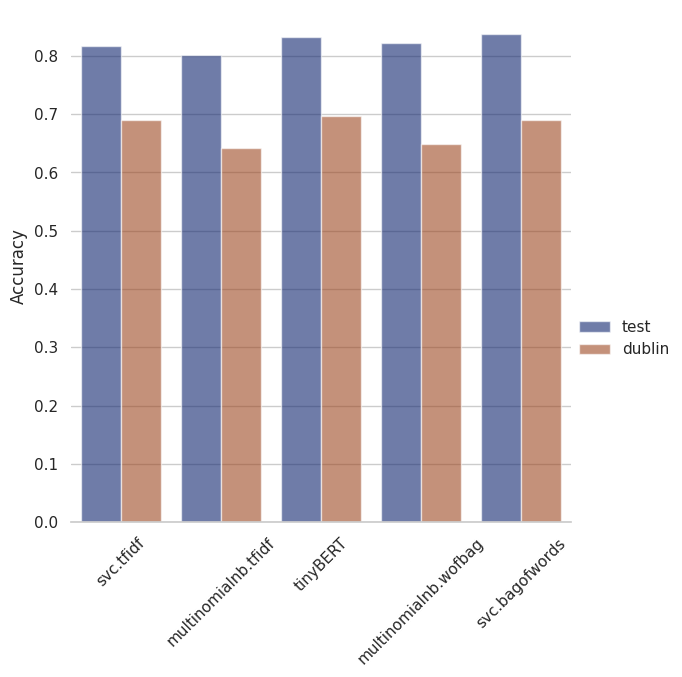

In [22]:
import assigment.utility.plots as u_plots

u_plots.grouped_bar(merged_df, 'f1_score')

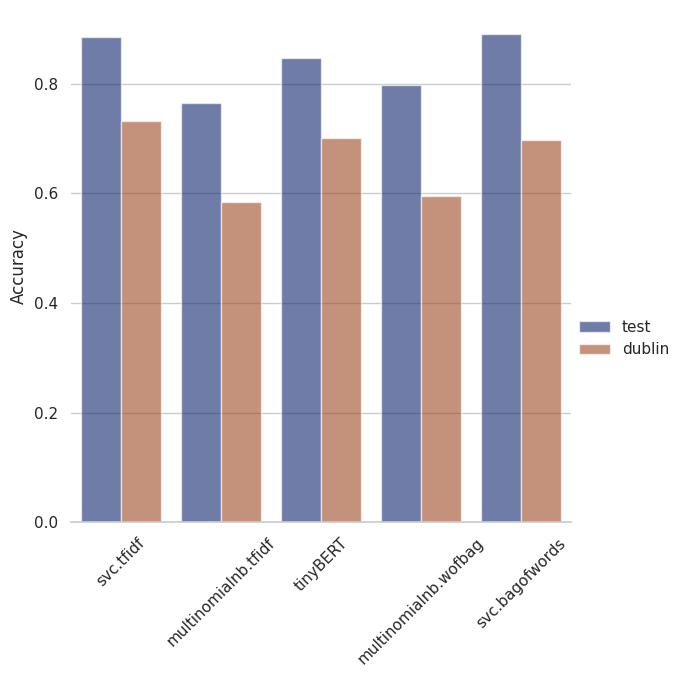

In [23]:
import assigment.utility.plots as u_plots

u_plots.grouped_bar(merged_df, 'recall_score')